# Data Visualization

Topics:
+ Variables: categorical vs numerical
+ Visualization
+ seaborn: catplot, relplot, displot

Dataset:
+ Iris


---
### review of dataframe transformation

We have a dataframe. We want to create a new column based on conditions of other columns.

One general approach is to create a series by **apply**ing a criterion on that dataframe.

The criterion is a function.



In [ ]:
#PID:6
#
# Create a new column to indicate a smoker group that tips more than 18%.
#
import pandas

def my_criteria(row):
    if row['smoker']=='Yes' and row['tip_perc']>0.18:
        return True
    else:
        return False

tips = pandas.read_csv('../Datasets/tips.csv')
tips['tip_perc'] = tips['tip']/tips['total_bill']
tips['smokers_who_tip_well'] = tips.apply(my_criteria, axis=1)


In [17]:
tips['test'] = (tips['smoker']=='Yes') & (tips['tip_perc']>0.18)
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size,tip_perc,test
204,20.53,4.00,Male,Yes,Thur,Lunch,4,0.194837,True
216,28.15,3.00,Male,Yes,Sat,Dinner,5,0.106572,False
27,12.69,2.00,Male,No,Sat,Dinner,2,0.157604,False
17,16.29,3.71,Male,No,Sun,Dinner,3,0.227747,False
125,29.80,4.20,Female,No,Thur,Lunch,6,0.140940,False


### Visualization

In [18]:
import pandas
import seaborn
from matplotlib import pyplot

iris = pandas.read_csv('../Datasets/iris.csv')
iris.sample(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
81,5.5,2.4,3.7,1.0,versicolor
25,5.0,3.0,1.6,0.2,setosa
21,5.1,3.7,1.5,0.4,setosa
24,4.8,3.4,1.9,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa


### Creating new columns

Task: create a new column "category" with 2 values:
+ small - if sepal length is less than average.
+ large - if sepal length is at least average.


In [36]:
def categorize_size( row ):
    avg_sl = iris['SepalLength'].mean()
    if row['SepalLength'] < avg_sl:
        return 'small-' + row['Species']
    else:
        return 'large-' + row['Species']

iris['category'] = iris.apply(categorize_size, axis=1)


Line 2 is repeatedly calculated. This is not efficient.  We can make this calculation global. But that introduces other problems.

In [39]:
def f( df ):
    def categorize_size( row ):
        if row['SepalLength'] < avg_sl:
            return 'small-' + row['Species']
        else:
            return 'large-' + row['Species']
    avg_sl = df['SepalLength'].mean()
    return categorize_size

iris['category'] = iris.apply(f(iris), axis=1)
# iris.sample(5)

In [38]:
f(iris)

<function __main__.f.<locals>.categorize_size(row)>

### Visualizing data

In [40]:
import seaborn
from matplotlib import pyplot

To choose a type of figure/graph/visualization, we must understand the types of the variables.

Seaborn provides 3 main types of visualization:
+ catplot -- compare/contrast a categorical variable versus a numerical variable.
+ relplot -- compare/contrast a numerical variable versus a numerical variable.
+ displot -- look at the distribution of a numerical variable, or two variables.



#### Cat plot

Task: compare the sepal area of the three species.

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
iris['sepal_area'] = iris['SepalLength'] * iris['SepalWidth']

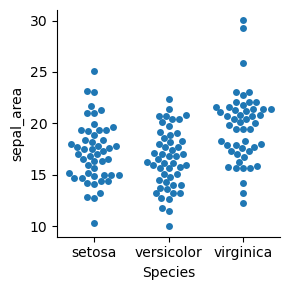

In [54]:
seaborn.catplot(data=iris, x='Species', y='sepal_area', kind='swarm', height=3)

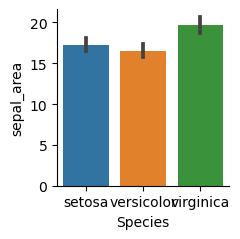

In [55]:
seaborn.catplot(data=iris, x='Species', y='sepal_area', kind='bar', height=2.5)

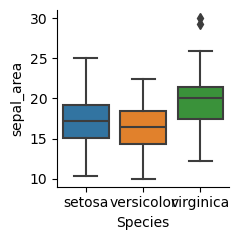

In [57]:
seaborn.catplot(data=iris, x='Species', y='sepal_area', kind='box', height=2.5)

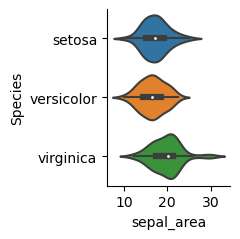

In [59]:
seaborn.catplot(data=iris, y='Species', x='sepal_area', kind='violin', height=2.5)

Visually, we see a difference (setosa is smallest, virginica is largest).

This visual comparison makes sense because what we compare is normal.

### Displot

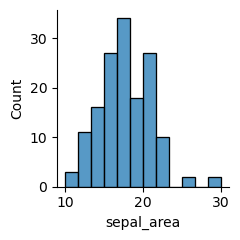

In [62]:
seaborn.displot(data=iris, x='sepal_area', kind='hist', height=2.5)

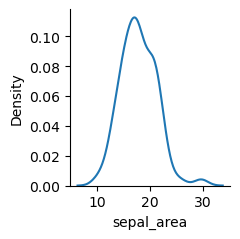

In [63]:
seaborn.displot(data=iris, x='sepal_area', kind='kde', height=2.5)

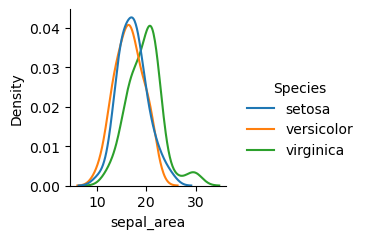

In [64]:
seaborn.displot(data=iris, x='sepal_area', hue='Species', kind='kde', height=2.5)

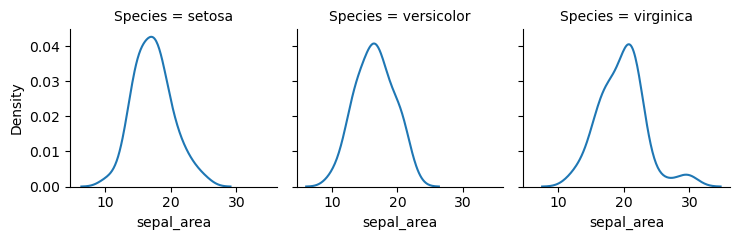

In [67]:
seaborn.displot(data=iris, x='sepal_area', col='Species', kind='kde', height=2.5)

### displot

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas
from seaborn import displot

In [2]:
iris = pandas.read_csv('../Datasets/iris.csv')
iris.sample(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
35,5.0,3.2,1.2,0.2,setosa
90,5.5,2.6,4.4,1.2,versicolor
101,5.8,2.7,5.1,1.9,virginica
132,6.4,2.8,5.6,2.2,virginica
77,6.7,3.0,5.0,1.7,versicolor


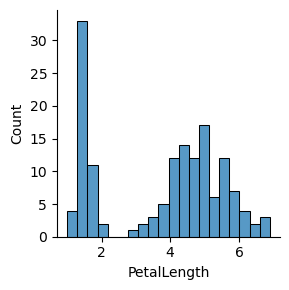

In [8]:
displot(data=iris, x='PetalLength', height=3, kind='hist', bins=20)

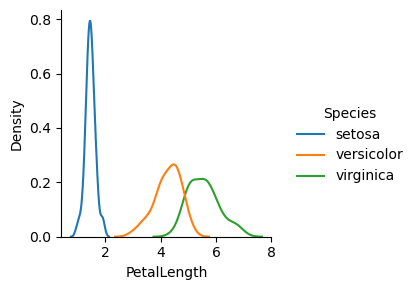

In [10]:
displot(data=iris, x='PetalLength', height=3, kind='kde', hue='Species')

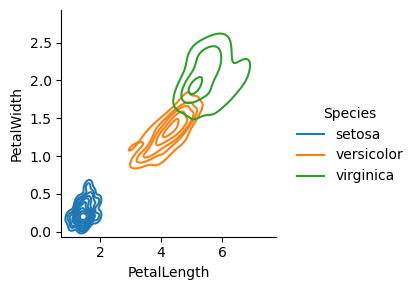

In [13]:
displot(data=iris, x='PetalLength', y='PetalWidth', height=3, kind='kde', hue='Species')

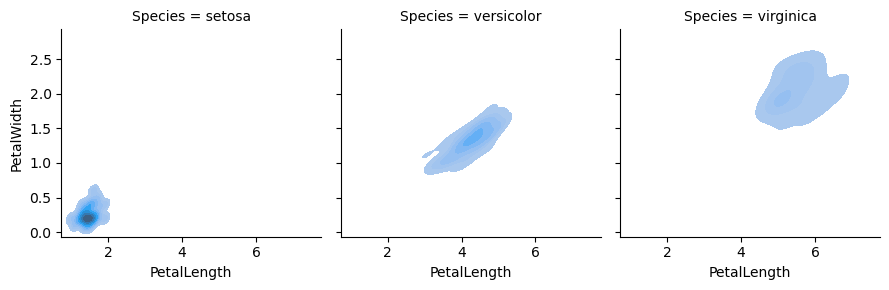

In [15]:
displot(data=iris, x='PetalLength', y='PetalWidth', height=3, kind='kde', col='Species', fill=True)

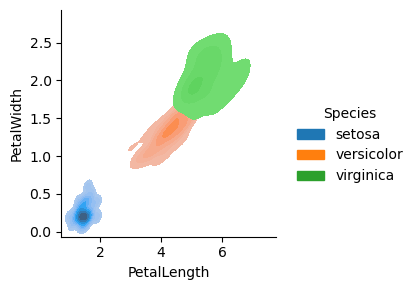

In [16]:
displot(data=iris, x='PetalLength', y='PetalWidth', height=3, kind='kde', hue='Species', fill=True)